<a href="https://colab.research.google.com/github/Jackson-Mu/App-vz/blob/main/FIFA_App__Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<center>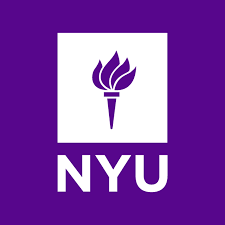</center>

___

## <center>Data Science 4 Everyone 🚀</center>

<center>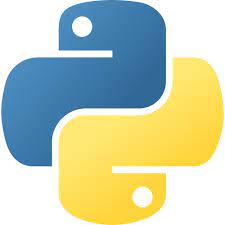</center>

### <center>Session: Linear Regression - Solution </center>

<center>Course provided by:</center>

[<center>Professor Gaëtan Brison</center>](https://github.com/gaetanbrison)
___

# 📈 Linear Regression with Python¶




<center><img src="https://miro.medium.com/v2/resize:fit:1400/0*-P1TLY-tuG09kXDz" width=300 height=200/></center>

## 💾 Data¶

We are going to use the FIFA 2023 World Cip dataset. Since The World cup is one othe most important event which happens in our World.

The data contains the Following columns:

'team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right inside channel team1',
       'right inside channel team2', 'right channel team1',
       'right channel team2', 'total offers to receive team1',
       'total offers to receive team2', 'inbehind offers to receive team1',
       'inbehind offers to receive team2', 'inbetween offers to receive team1',
       'inbetween offers to receive team2', 'infront offers to receive team1',
       'infront offers to receive team2',
       'receptions between midfield and defensive lines team1',
       'receptions between midfield and defensive lines team2',
       'attempted line breaks team1', 'attempted line breaks team2',
       'completed line breaksteam1', 'completed line breaks team2',
       'attempted defensive line breaks team1',
       'attempted defensive line breaks team2',
       'completed defensive line breaksteam1',
       'completed defensive line breaks team2', 'yellow cards team1',
       'yellow cards team2', 'red cards team1', 'red cards team2',
       'fouls against team1', 'fouls against team2', 'offsides team1',
       'offsides team2', 'passes team1', 'passes team2',
       'passes completed team1', 'passes completed team2', 'crosses team1',
       'crosses team2', 'crosses completed team1', 'crosses completed team2',
       'switches of play completed team1', 'switches of play completed team2',
       'corners team1', 'corners team2', 'free kicks team1',
       'free kicks team2', 'penalties scored team1', 'penalties scored team2',
       'goal preventions team1', 'goal preventions team2', 'own goals team1',
       'own goals team2', 'forced turnovers team1', 'forced turnovers team2',
       'defensive pressures applied team1',
       'defensive pressures applied team2'

## 📤 Import Libraries

In [18]:
pip install hvplot --quiet

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

## 🔎 Check out the Data

In [20]:
FIFAWorldCupMatches = pd.read_csv('FIFAWorldCupMatches.csv')
FIFAWorldCupMatches.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [21]:
FIFAWorldCupMatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

In [22]:
FIFAWorldCupMatches.describe()

,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.578125,1.109375,11.140625,11.281250,1.109375,1.578125,1.468750,0.984375,0.093750,0.109375,...,0.140625,0.125000,11.593750,11.359375,0.015625,0.015625,71.968750,70.125000,289.750000,293.265625
std,1.551289,1.055856,4.972519,5.807682,1.055856,1.551289,1.563155,0.999876,0.293785,0.314576,...,0.350382,0.377964,5.911299,4.990045,0.125000,0.125000,14.394629,13.531269,88.406888,80.916230
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,0.000000,0.000000,8.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,229.000000,233.750000
50%,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,11.000000,10.000000,0.000000,0.000000,71.000000,72.000000,281.000000,292.500000
75%,2.000000,2.000000,14.000000,14.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,83.500000,79.000000,328.000000,327.500000
max,7.000000,4.000000,25.000000,32.000000,4.000000,7.000000,7.000000,4.000000,1.000000,1.000000,...,1.000000,2.000000,32.000000,26.000000,1.000000,1.000000,101.000000,104.000000,637.000000,585.000000


In [23]:
FIFAWorldCupMatches.columns

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right in

In [26]:
import pandas as pd

# Assuming FIFAWorldCupMatches is your DataFrame
df2 = FIFAWorldCupMatches[["team1", "possession team1", "number of goals team1", "corners team1", "on target attempts team1"]]

# Check the number of rows in the DataFrame
num_rows = len(FIFAWorldCupMatches)

# If the number of rows is less than 1000, sample all rows, otherwise, sample 1000 rows
if num_rows < 1000:
    df2 = FIFAWorldCupMatches.sample(n=num_rows)
else:
    df2 = FIFAWorldCupMatches.sample(n=1000)


In [163]:
FIFAWorldCupMatches.shape

(64, 88)

In [155]:
df2 = FIFAWorldCupMatches[["team1","team2" ,"possession team1", "number of goals team1", "corners team1", "on target attempts team1", "defensive pressures applied team1","defensive pressures applied team2", 'free kicks team1']]



## 📊 Exploratory Data Analysis (EDA)
Let's create some simple plots to check out the data!

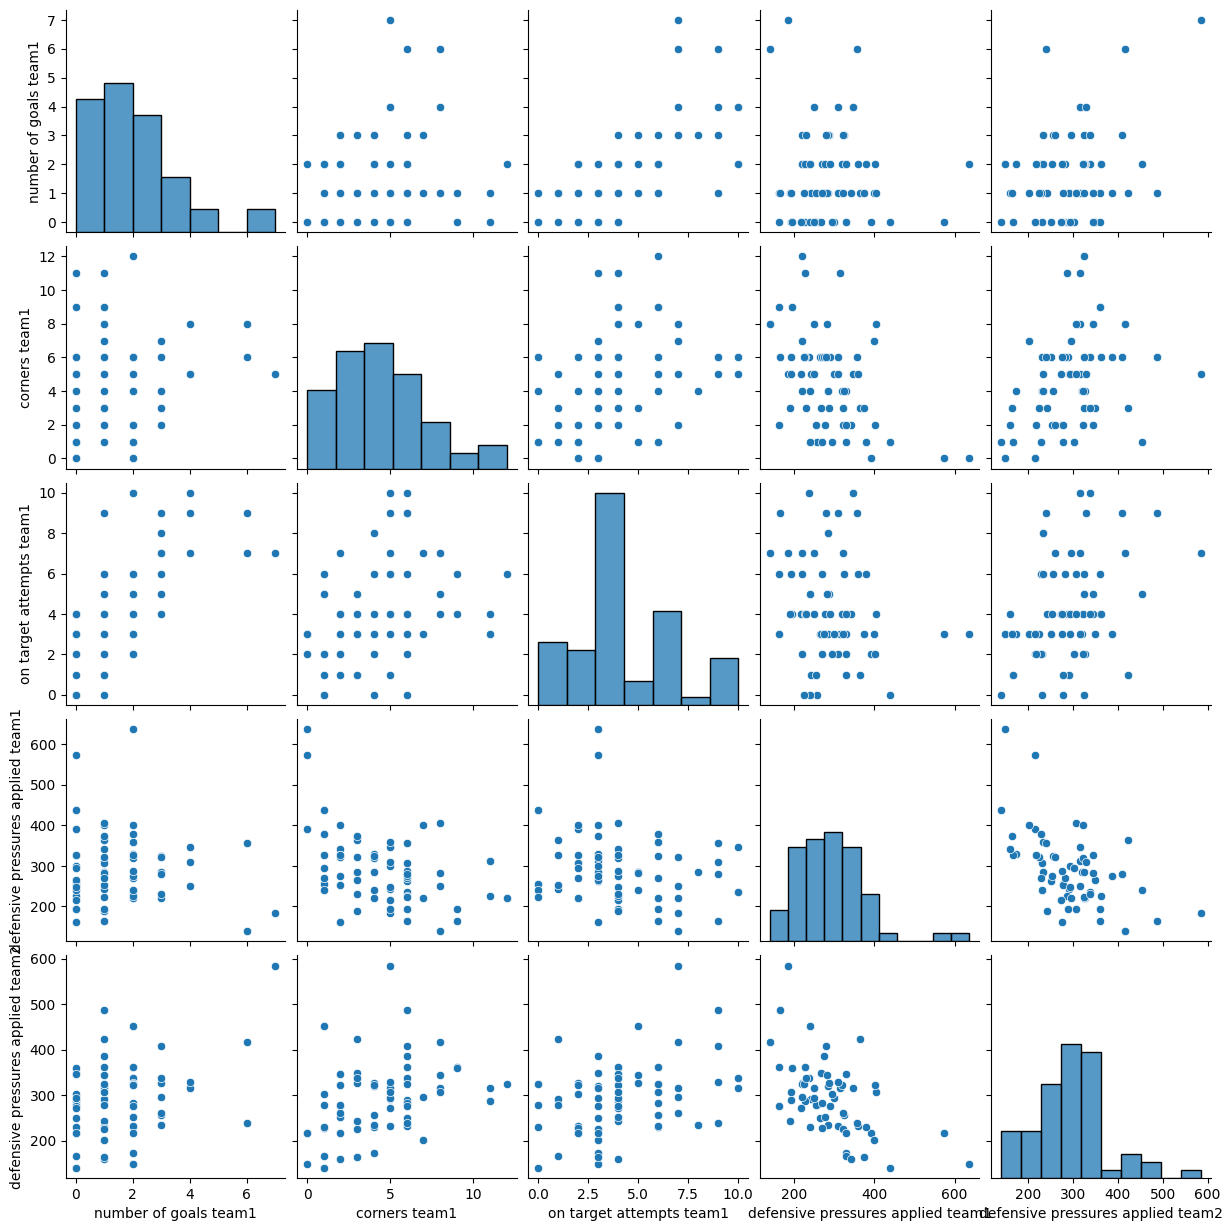

In [106]:
sns.pairplot(df2)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: >, <Axes: >]], dtype=object)

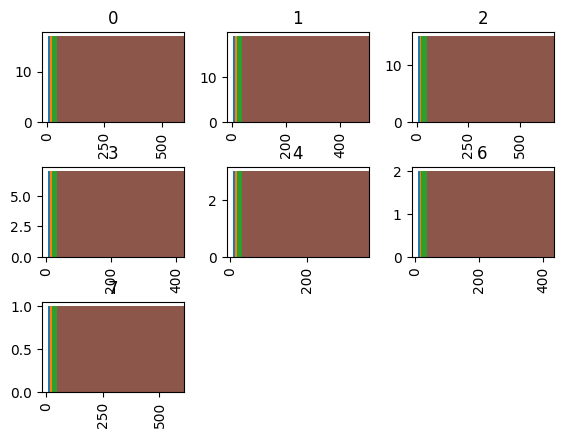

In [162]:
#df2.hist(by='number of goals team1', subplots=False, width=1000)
df2.hist(by='number of goals team1', width=1000)


In [161]:
df2.head()

,team1,team2,possession team1,number of goals team1,corners team1,on target attempts team1,defensive pressures applied team1,defensive pressures applied team2,free kicks team1
0,QATAR,ECUADOR,42%,0,1,0,256,279,19
1,ENGLAND,IRAN,72%,6,8,7,139,416,16
2,SENEGAL,NETHERLANDS,44%,0,6,3,263,251,14
3,UNITED STATES,WALES,51%,1,5,1,242,292,11
4,ARGENTINA,SAUDI ARABIA,64%,1,9,6,163,361,22


In [113]:
df2.hvplot.hist("number of goals team1")

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-p

:Histogram   [number of goals team1]   (number of goals team1_count)

In [118]:
df2.hvplot.scatter(x='possession team1', y="number of goals team1")

:Scatter   [possession team1]   (number of goals team1)

In [164]:
df2.columns

Index(['team1', 'team2', 'possession team1', 'number of goals team1',
       'corners team1', 'on target attempts team1',
       'defensive pressures applied team1',
       'defensive pressures applied team2', 'free kicks team1'],
      dtype='object')

<ipython-input-165-f0e85bb32909>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['number of goals team1'])


<Axes: xlabel='number of goals team1', ylabel='Density'>

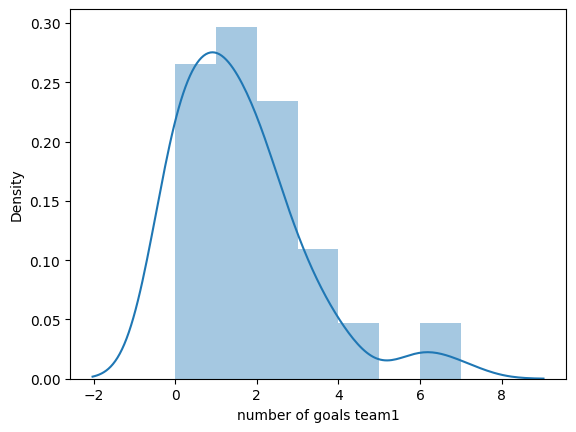

In [165]:
sns.distplot(df2['number of goals team1'])

In [166]:
df2.isnull().sum()

team1                                0
team2                                0
possession team1                     0
number of goals team1                0
corners team1                        0
on target attempts team1             0
defensive pressures applied team1    0
defensive pressures applied team2    0
free kicks team1                     0
dtype: int64

In [167]:
print("Unique values in 'team1':", df2['team1'].unique())
print("Unique values in 'team2':", df2['team2'].unique())


Unique values in 'team1': ['QATAR' 'ENGLAND' 'SENEGAL' 'UNITED STATES' 'ARGENTINA' 'DENMARK'
 'MEXICO' 'FRANCE' 'MOROCCO' 'GERMANY' 'SPAIN' 'BELGIUM' 'SWITZERLAND'
 'URUGUAY' 'PORTUGAL' 'BRAZIL' 'WALES' 'NETHERLANDS' 'TUNISIA' 'POLAND'
 'JAPAN' 'CROATIA' 'CAMEROON' 'KOREA REPUBLIC' 'ECUADOR' 'IRAN'
 'AUSTRALIA' 'SAUDI ARABIA' 'CANADA' 'COSTA RICA' 'GHANA' 'SERBIA']
Unique values in 'team2': ['ECUADOR' 'IRAN' 'NETHERLANDS' 'WALES' 'SAUDI ARABIA' 'TUNISIA' 'POLAND'
 'AUSTRALIA' 'CROATIA' 'JAPAN' 'COSTA RICA' 'CANADA' 'CAMEROON'
 'KOREA REPUBLIC' 'GHANA' 'SERBIA' 'SENEGAL' 'UNITED STATES' 'DENMARK'
 'MEXICO' 'MOROCCO' 'GERMANY' 'SWITZERLAND' 'URUGUAY' 'QATAR' 'ENGLAND'
 'FRANCE' 'ARGENTINA' 'BELGIUM' 'SPAIN' 'PORTUGAL' 'BRAZIL']


In [168]:
from sklearn.preprocessing import LabelEncoder

# Assuming df2 is your DataFrame and 'team1' is the column you want to convert
encoder = LabelEncoder()
df2['team1_encoded'] = encoder.fit_transform(df2['team1'])

# Now 'team1_encoded' contains the numerical values for the 'team1' column

encoder = LabelEncoder()
df2['team2_encoded'] = encoder.fit_transform(df2['team2'])

# Remove the percentage sign and convert to float
df2['possession team1'] = df2['possession team1'].str.rstrip('%').astype(float) / 100


<ipython-input-168-332fe3f16b0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['team1_encoded'] = encoder.fit_transform(df2['team1'])
<ipython-input-168-332fe3f16b0c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['team2_encoded'] = encoder.fit_transform(df2['team2'])
<ipython-input-168-332fe3f16b0c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

<Axes: >

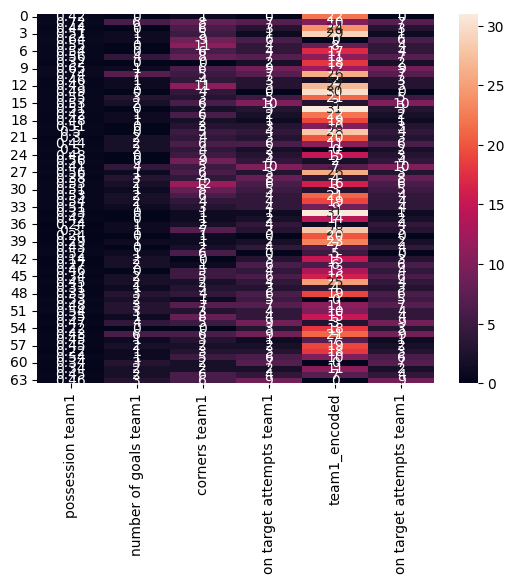

In [169]:
# Assuming df2 is your DataFrame containing numerical and encoded columns
numerical_columns = ['possession team1', 'number of goals team1', 'corners team1', 'on target attempts team1', 'team1_encoded',"on target attempts team1" ]
heatmap_data = df2[numerical_columns]

# Plot the heatmap
sns.heatmap(data=heatmap_data, annot=True)


## 📈 Training a Linear Regression Model
Let's now begin to train our regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case, the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [126]:
X = df2[['team1_encoded', 'possession team1', 'corners team1', 'on target attempts team1']]
y = df2['number of goals team1']

### 🧱 Train Test Split
Now, let's split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

Linear Regression

Model Evaluation

In [129]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
team1_encoded,0.030973
possession team1,3.628464
corners team1,-0.108480
on target attempts team1,0.485262



Interpreting the coefficients:

    Holding all other features fixed, a 1 unit increase in team1_encoded (which  represents different teams) is associated with an increase of 0.030973 goals scored by team 1.

This means that different teams may have different scoring tendencies, and this coefficient represents the impact of each unique team on the number of goals scored by team 1.

    Holding all other features fixed, a 1 unit increase in possession team1 (which represents the possession percentage of team 1) is associated with an increase of 3.628464 goals scored by team 1.

This suggests that possession of the ball by team 1 is positively correlated with the number of goals scored by team 1, with each percentage increase in possession associated with an increase in goals scored.

    Holding all other features fixed, a 1 unit increase in corners team1 (which represents the number of corners obtained by team 1) is associated with a decrease of 0.108480 goals scored by team 1.

This suggests that more corners obtained by team 1 are negatively correlated with the number of goals scored by team 1, with each additional corner associated with a slight decrease in goals scored.

    Holding all other features fixed, a 1 unit increase in on target attempts team1 (which represents the number of on-target attempts made by team 1) is associated with an increase of 0.485262 goals scored by team 1.

This suggests that more on-target attempts made by team 1 are positively correlated with the number of goals scored by team 1, with each additional on-target attempt associated with an increase in goals scored.

These interpretations provide insights into how each feature relates to the number of goals scored by team 1 while controlling for the other features.

✔️ Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [130]:
pred = lin_reg.predict(X_test)

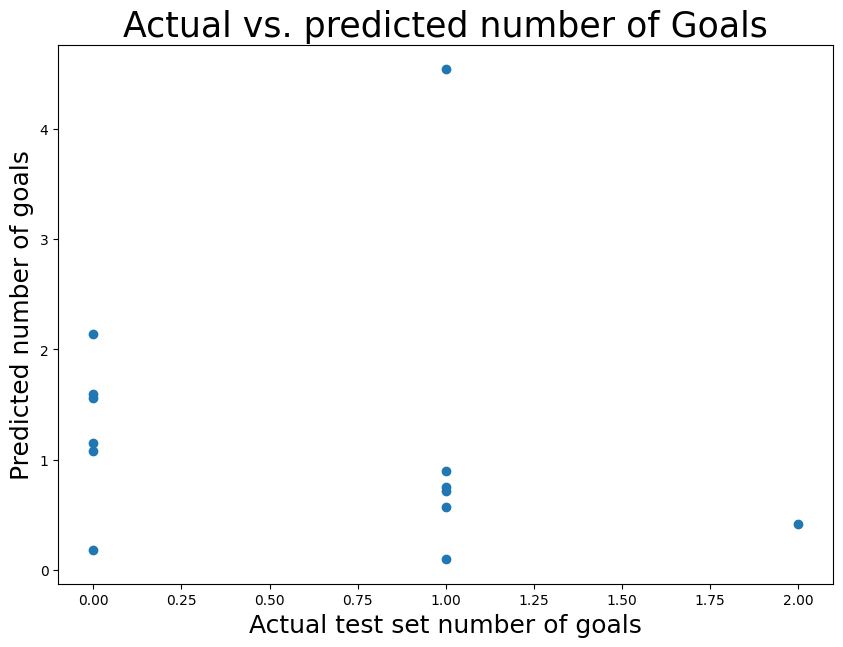

In [131]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted number of Goals",fontsize=25)
plt.xlabel("Actual test set number of goals",fontsize=18)
plt.ylabel("Predicted number of goals", fontsize=18)
plt.scatter(x=y_test,y=pred)


Residual Histogram

### 🛠 Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [132]:
from sklearn import metrics

In [133]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.1376065314878239
MSE: 2.1717935549024783
RMSE: 1.4737006327278543


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Compute R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: -4.561107739068467


In the context of Our dataset, a negative R-squared value of -4.5611 suggests that the linear regression model we have trained does not capture the variation in the dependent variable (number of goals team1) well. It means that the model's predictions are worse than simply predicting the mean number of goals for all observations.

**Training Test 2**:

In [139]:
X = df2[['team1_encoded', 'corners team1', 'on target attempts team1', 'number of goals team1', 'defensive pressures applied team1']]
y = df2['possession team1']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df



,Coefficient
team1_encoded,0.000154
corners team1,0.007600
on target attempts team1,-0.006037
number of goals team1,0.020545
defensive pressures applied team1,-0.000948


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in team1_encoded is associated with a slight increase in possession of team1.

Holding all other features fixed, a 1 unit increase in corners team1 is associated with a small increase in possession of team1.

Holding all other features fixed, a 1 unit increase in on target attempts team1 is associated with a slight decrease in possession of team1.

Holding all other features fixed, a 1 unit increase in number of goals team1 is associated with a moderate increase in possession of team1.

Holding all other features fixed, a 1 unit increase in defensive pressures applied team1 is associated with a slight decrease in possession of team1.

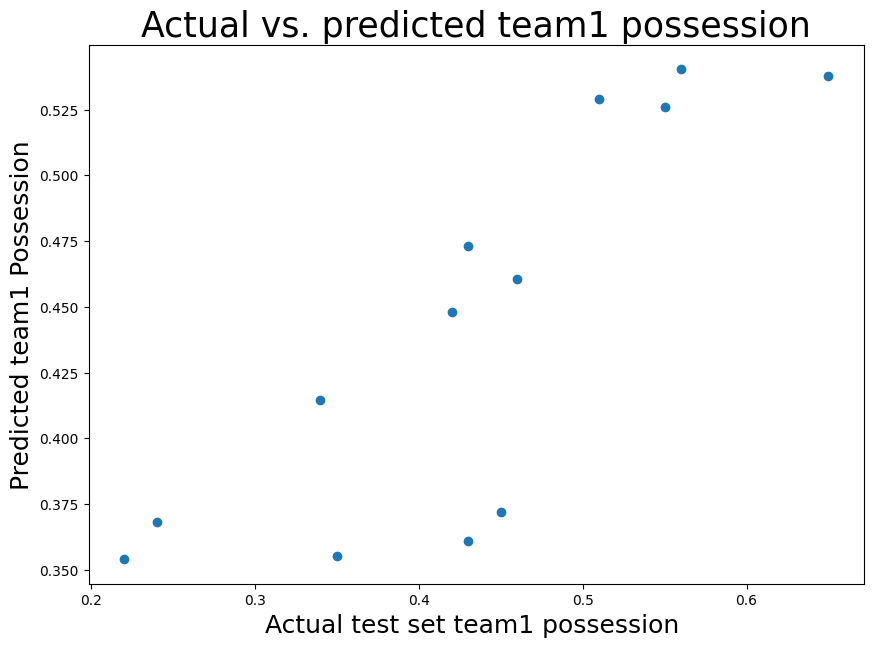

In [140]:
pred = lin_reg.predict(X_test)

plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted team1 possession",fontsize=25)
plt.xlabel("Actual test set team1 possession ",fontsize=18)
plt.ylabel("Predicted team1 Possession", fontsize=18)
plt.scatter(x=y_test,y=pred)


In [141]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.05656288878555868
MSE: 0.005183222926437799
RMSE: 0.07199460345357699


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Compute R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.6301137257968128


This suggests that the model performs reasonably well in predicting team 1 possession. As, about 63.01% of the variability in team 1 possession can be explained by all independent variables included in the model.

**Training 3rd Model :**

In [143]:
X = df2[['team1_encoded', 'corners team1', 'possession team1', 'number of goals team1', 'defensive pressures applied team1']]
y = df2['on target attempts team1']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
team1_encoded,-0.091277
corners team1,0.292333
possession team1,-4.095199
number of goals team1,0.995584
defensive pressures applied team1,-0.000755


Interpreting the coefficients:

  1 unit increase in 'team1_encoded' is associated with a decrease of 0.091277 in on-target attempts by team 1.

  1 unit increase in 'corners team1' is associated with an increase of 0.292333 in on-target attempts by team 1.

  1 unit increase in 'possession team1' is associated with a decrease of 4.095199 in on-target attempts by team 1.

  1 unit increase in 'number of goals team1' is associated with an increase of 0.995584 in on-target attempts by team 1.

  1 unit increase in 'defensive pressures applied team1' is associated with a decrease of 0.000755 in on-target attempts by team 1.

These interpretations provide insights into how each feature relates to the number of on-target attempts made by team 1, while controlling for the other features.

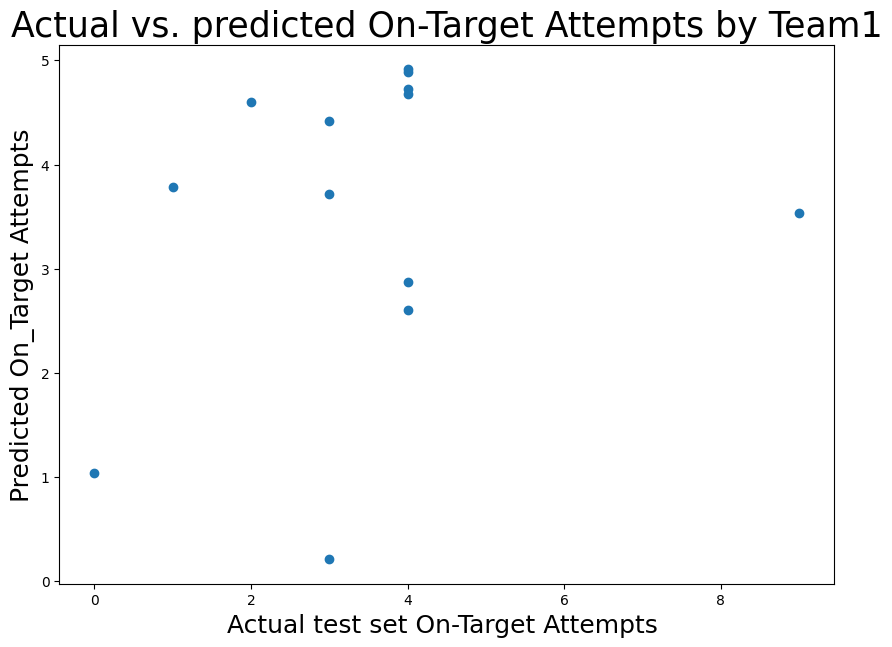

In [144]:
pred = lin_reg.predict(X_test)

plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted On-Target Attempts by Team1",fontsize=25)
plt.xlabel("Actual test set On-Target Attempts ",fontsize=18)
plt.ylabel("Predicted On_Target Attempts", fontsize=18)
plt.scatter(x=y_test,y=pred)


In [145]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.7335325383460876
MSE: 4.735875939968789
RMSE: 2.1762067778519554


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Compute R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: -0.1565939795588518


The R-squared score of -0.1566 indicates that our model does not fit the data well in predicting the on-target attempts by team 1.  

It suggests that the chosen features do not explain much of the variability in on-target attempts by team 1, and the model may be capturing noise rather than meaningful relationships.

**Training 4th Model**

In [147]:
X = df2[['team1_encoded', 'on target attempts team1', 'possession team1', 'number of goals team1', 'defensive pressures applied team1']]
y = df2['corners team1']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
team1_encoded,0.036357
on target attempts team1,0.448589
possession team1,7.911968
number of goals team1,-0.282213
defensive pressures applied team1,-0.005564


Interpreting the coefficients:

  1 unit increase in 'team1_encoded' is associated with an increase of 0.036357 in the number of corners obtained by team 1.

  1 unit increase in 'on target attempts team1' is associated with an increase of 0.448589 in the number of corners obtained by team 1.

  1 unit increase in 'possession team1' is associated with an increase of 7.911968 in the number of corners obtained by team 1.

  1 unit increase in 'number of goals team1' is associated with a decrease of 0.282213 in the number of corners obtained by team 1.

  1 unit increase in 'defensive pressures applied team1' is associated with a decrease of 0.005564 in the number of corners obtained by team

These interpretations provide insights into how each feature relates to the number of corners obtained by team 1, while controlling for the other features.

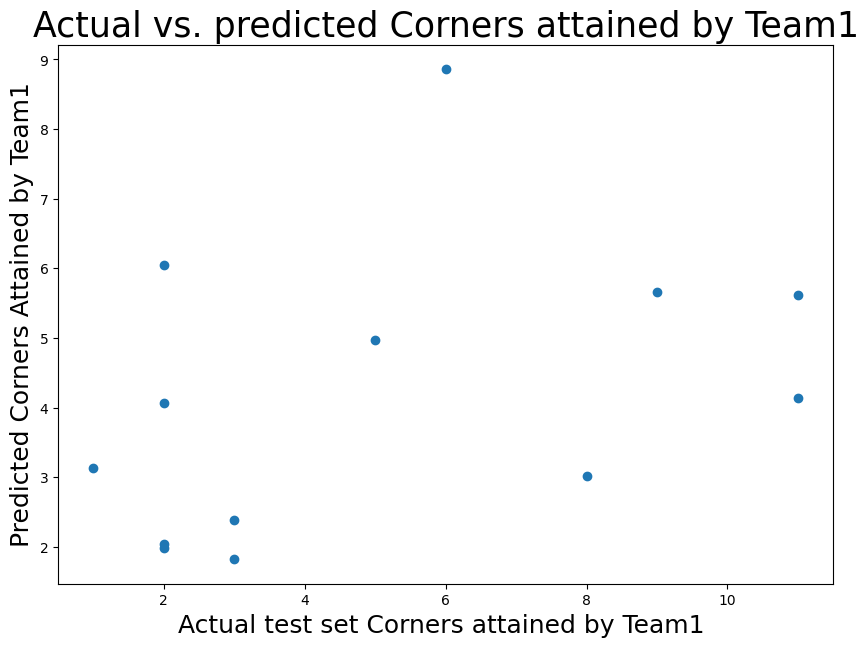

In [148]:
pred = lin_reg.predict(X_test)

plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted Corners attained by Team1",fontsize=25)
plt.xlabel("Actual test set Corners attained by Team1 ",fontsize=18)
plt.ylabel("Predicted Corners Attained by Team1", fontsize=18)
plt.scatter(x=y_test,y=pred)


In [149]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2.581024499840819
MSE: 11.32365929893307
RMSE: 3.365064531169212


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Compute R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.06830651337892468


The R-squared score of 0.0683 suggests that our model explains only about 6.83% of the variability in corners attained by team 1, indicating limited predictive power.  

The remaining variability in the number of corners obtained by team 1 is likely due to factors not included in the model or random variation.

**Training 5th Model**

In [151]:
X = df2[['team1_encoded', 'on target attempts team1', 'possession team1', 'number of goals team1', 'corners team1']]
y = df2['defensive pressures applied team1']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
team1_encoded,0.745670
on target attempts team1,-0.734163
possession team1,-625.255207
number of goals team1,10.184720
corners team1,-3.524892


Interpreting the coefficients:

  1 unit increase in 'team1_encoded' is associated with an increase of 0.745670 in defensive pressures applied by team 1.

  1 unit increase in 'on target attempts team1' is associated with a decrease of 0.734163 in defensive pressures applied by team 1.

  1 unit increase in 'possession team1' is associated with a decrease of 625.255207 in defensive pressures applied by team 1.

  1 unit increase in 'number of goals team1' is associated with an increase of 10.184720 in defensive pressures applied by team 1.

  1 unit increase in 'corners team1' is associated with a decrease of 3.524892 in defensive pressures applied by team 1.

These interpretations provide insights into how each feature relates to the defensive pressures applied by team 1, while controlling for the other features.

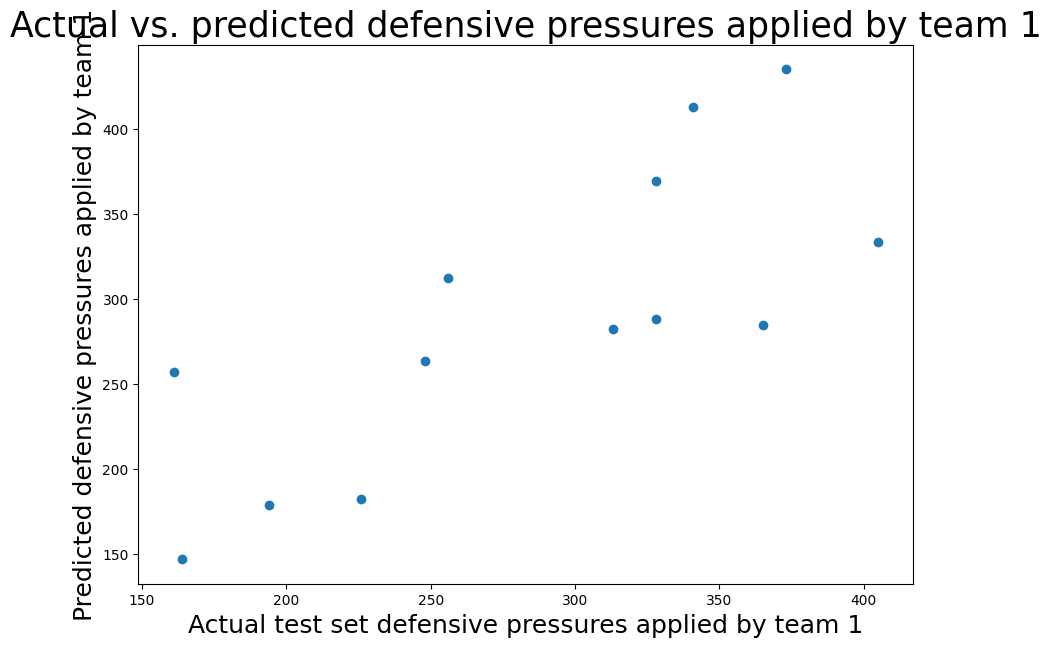

In [152]:
pred = lin_reg.predict(X_test)

plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted defensive pressures applied by team 1",fontsize=25)
plt.xlabel("Actual test set defensive pressures applied by team 1",fontsize=18)
plt.ylabel("Predicted defensive pressures applied by team 1", fontsize=18)
plt.scatter(x=y_test,y=pred)


In [153]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 49.35658757205758
MSE: 3066.5521177707506
RMSE: 55.37645815480393


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Compute R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.5026197817722693


  The R-squared score of 0.5026 indicates that our model explains approximately 50.26% of the variability in defensive pressures applied by team 1, suggesting moderate predictive power of our model.
  

**Training 6th Model**

In [170]:
X = df2[['team1_encoded', 'on target attempts team1', 'possession team1', 'number of goals team1', 'corners team1', 'defensive pressures applied team1']]
y = df2['free kicks team1']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df





,Coefficient
team1_encoded,-0.125053
on target attempts team1,-0.449737
possession team1,11.782279
number of goals team1,0.155201
corners team1,-0.187196
defensive pressures applied team1,-0.001074


Interpreting the coefficients:

  1 unit increase in 'team1_encoded' is associated with a decrease of 0.125053 in the number of free kicks obtained by team 1.

  1 unit increase in 'on target attempts team1' is associated with a decrease of 0.449737 in the number of free kicks obtained by team 1.

  1 unit increase in 'possession team1' is associated with an increase of 11.782279 in the number of free kicks obtained by team 1.

  1 unit increase in 'number of goals team1' is associated with an increase of 0.155201 in the number of free kicks obtained by team 1.

  1 unit increase in 'corners team1' is associated with a decrease of 0.187196 in the number of free kicks obtained by team 1.

  1 unit increase in 'defensive pressures applied team1' is associated with a decrease of 0.001074 in the number of free kicks obtained by team 1.

These interpretations provide insights into how each feature relates to the number of free kicks obtained by team 1, while controlling for the other features.

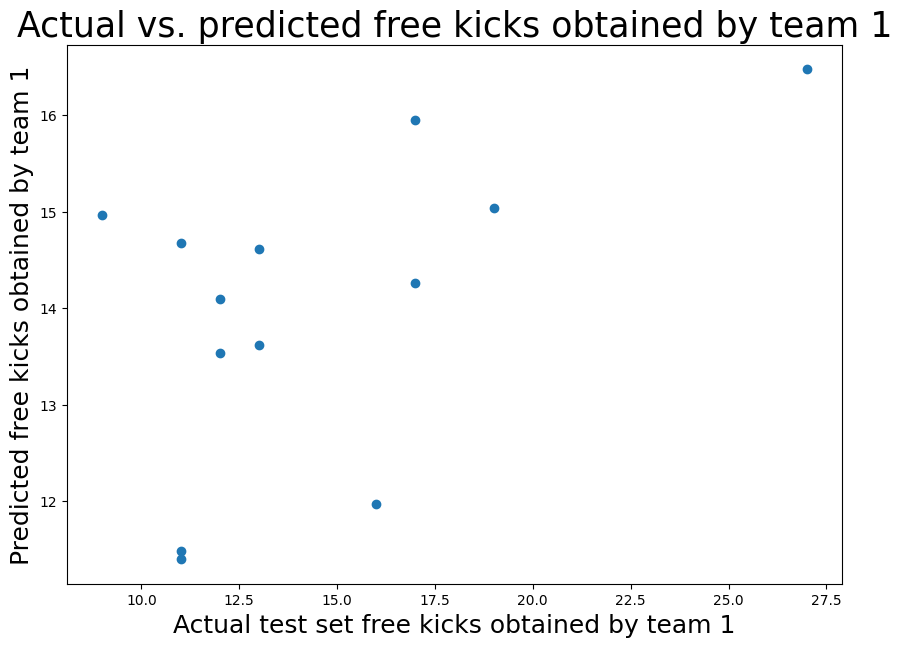

In [171]:
pred = lin_reg.predict(X_test)

plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted free kicks obtained by team 1",fontsize=25)
plt.xlabel("Actual test set free kicks obtained by team 1",fontsize=18)
plt.ylabel("Predicted free kicks obtained by team 1", fontsize=18)
plt.scatter(x=y_test,y=pred)

In [172]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2.975208467311037
MSE: 16.19090688236973
RMSE: 4.023792599323396


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Compute R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.23525342003340277


  The R-squared score of 0.2353 indicates that our model explains approximately 23.53% of the variability in the number of free kicks obtained by team 1.
  The remaining variability in the number of free kicks obtained by team 1 is likely due to other avriables and factors not included in the model or random variation.

## Congratulations you made it 🎉